In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import tensorflow as tf
import os
import PIL
import shutil





In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [ ]:
base_dir = '/content/gdrive/MyDrive/Colab Notebooks/images/'






In [ ]:
base_dir = '/content/gdrive/MyDrive/Colab Notebooks/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# 훈련용 O/X 이미지 경로
train_o_dir = os.path.join(train_dir, 'O')
train_x_dir = os.path.join(train_dir, 'X')
print(train_o_dir, train_x_dir)

# 검증용 O/X 이미지 경로
validation_o_dir = os.path.join(validation_dir, 'O')
validation_x_dir = os.path.join(validation_dir, 'X')
print(validation_o_dir, validation_x_dir)

# 테스트용 O/X 이미지 경로
test_o_dir = os.path.join(test_dir, 'O')
test_x_dir = os.path.join(test_dir, 'X')
print(test_o_dir, test_x_dir)


/content/gdrive/MyDrive/Colab Notebooks/images/train/O /content/gdrive/MyDrive/Colab Notebooks/images/train/X
/content/gdrive/MyDrive/Colab Notebooks/images/validation/O /content/gdrive/MyDrive/Colab Notebooks/images/validation/X
/content/gdrive/MyDrive/Colab Notebooks/images/test/O /content/gdrive/MyDrive/Colab Notebooks/images/test/X


In [ ]:
# train_o_fnames = os.listdir(train_o_dir)
# train_x_fnames = os.listdir(train_x_dir)

# print(train_o_fnames)
# print(train_x_fnames)

In [ ]:
# print('Total training o images :', len(os.listdir(train_o_dir)))
# print('Total training x images :', len(os.listdir(train_x_dir)))

# print('Total validation o images :', len(os.listdir(validation_o_dir)))
# print('Total validation x images :', len(os.listdir(validation_x_dir)))

# print('Total test o images :', len(os.listdir(test_o_dir)))
# print('Total test x images :', len(os.listdir(test_x_dir)))

In [ ]:
# # 이미지 확인
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg

# nrows, ncols = 4, 4
# pic_index = 0

# fig = plt.gcf()
# fig.set_size_inches(ncols*3, nrows*3)

# pic_index += 8

# next_o_pix = [os.path.join(train_o_dir, fname) for fname in train_o_fnames[pic_index-8:pic_index]]
# next_x_pix = [os.path.join(train_x_dir, fname) for fname in train_x_fnames[pic_index-8:pic_index]]

# for i, img_path in enumerate(next_o_pix+next_x_pix):
#     sp = plt.subplot(nrows, ncols, i+1)
#     sp.axis('OFF')

#     img = mpimg.imread(img_path)
#     plt.imshow(img)

# plt.show()

In [ ]:
# 이미지 데이터 전처리
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=25, # 0~25도 사이에서 임의의 각도로 원본이미지를 회전
                                   width_shift_range=0.05,
                                   height_shift_range=0.05,
                                   zoom_range=0.2, # (1-0.2)~(1+0.2) => 0.8~1.2 사이에서 임의의 수치만큼 확대/축소
                                   horizontal_flip=True, # 좌우로 뒤집기
                                   vertical_flip=True,
                                   fill_mode='nearest'
                                  )
validation_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=16,
                                                    color_mode='grayscale',
                                                    class_mode='binary',
                                                    target_size=(150,150))
validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                              batch_size=4,
                                                              color_mode='grayscale',
                                                              class_mode='binary',
                                                              target_size=(150,150))
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size=4,
                                                  color_mode='grayscale',
                                                  class_mode='binary',
                                                  target_size=(150,150))
# 참고로, generator 생성시 batch_size x steps_per_epoch (model fit에서) <= 훈련 샘플 수 보다 작거나 같아야 한다.

Found 80 images belonging to 2 classes.
Found 10 images belonging to 2 classes.
Found 14 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'O': 0, 'X': 1}

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary() # 신경망의 구조 확인

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 32)        0

In [ ]:
from tensorflow.keras.optimizers import RMSprop

# compile() 메서드를 이용해서 손실 함수 (loss function)와 옵티마이저 (optimizer)를 지정
model.compile(optimizer=RMSprop(learning_rate=0.01), # 옵티마이저로는 RMSprop 사용
              loss='binary_crossentropy', # 손실 함수로 ‘binary_crossentropy’ 사용
              metrics= ['accuracy'])
# RMSprop (Root Mean Square Propagation) Algorithm: 훈련 과정 중에 학습률을 적절하게 변화시킨다.

In [ ]:
# 모델 훈련
history = model.fit(train_generator,
                              validation_data=validation_generator, # validatino_generator안에도 검증용 X,y데이터들이 다 있으니 generator로 주면 됨
                              steps_per_epoch=1,
                              epochs=50,
                              validation_steps=1,
                              verbose=2)


Epoch 1/50
1/1 - 9s - loss: 0.6978 - accuracy: 0.5000 - val_loss: 81.2632 - val_accuracy: 0.7500 - 9s/epoch - 9s/step
Epoch 2/50
1/1 - 4s - loss: 219.8330 - accuracy: 0.3750 - val_loss: 58.7089 - val_accuracy: 0.5000 - 4s/epoch - 4s/step
Epoch 3/50
1/1 - 2s - loss: 53.6820 - accuracy: 0.5625 - val_loss: 2.9011 - val_accuracy: 0.2500 - 2s/epoch - 2s/step
Epoch 4/50
1/1 - 2s - loss: 0.9486 - accuracy: 0.7500 - val_loss: 0.6935 - val_accuracy: 0.5000 - 2s/epoch - 2s/step
Epoch 5/50
1/1 - 0s - loss: 0.7028 - accuracy: 0.3750 - val_loss: 0.7457 - val_accuracy: 0.2500 - 451ms/epoch - 451ms/step
Epoch 6/50
1/1 - 1s - loss: 0.6685 - accuracy: 0.6250 - val_loss: 13.8946 - val_accuracy: 0.2500 - 529ms/epoch - 529ms/step
Epoch 7/50
1/1 - 1s - loss: 6.2353 - accuracy: 0.6250 - val_loss: 0.7095 - val_accuracy: 0.2500 - 530ms/epoch - 530ms/step
Epoch 8/50
1/1 - 1s - loss: 0.6976 - accuracy: 0.4375 - val_loss: 0.6805 - val_accuracy: 1.0000 - 635ms/epoch - 635ms/step
Epoch 9/50
1/1 - 1s - loss: 0.6905

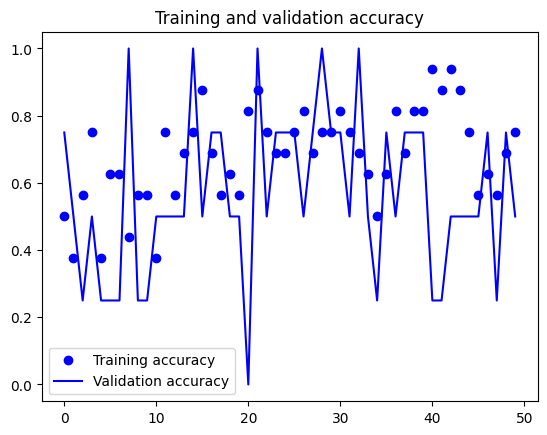

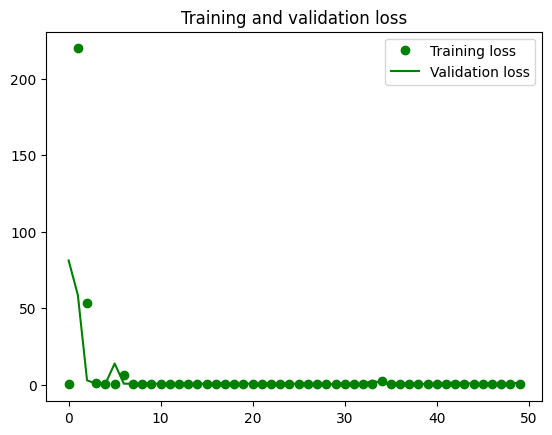

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'go', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()